In [1]:
import pandas as pd

In [2]:
## Reading data
HackathonSyntheticData = pd.read_csv('data/Hackathon_eddc2022_synth_5_Oct_2023.csv')

In [3]:
HackathonSyntheticData['total_time_in_ed'] = pd.to_datetime(HackathonSyntheticData['discharge_datetime']) - pd.to_datetime(HackathonSyntheticData['presentation_datetime'])


In [4]:
HackathonSyntheticData.columns

Index(['person_ID', 'establishment_code', 'presentation_datetime',
       'clinical_care_commencement_datetime', 'bed_request_datetime',
       'discharge_datetime', 'metropolitan_hospital_flag', 'age', 'sex',
       'ethnicity', 'triage_category', 'mode_of_arrival', 'departure_status',
       'affected_by_drugs_and_or_alcohol', 'self_harm_attendance',
       'mental_health_attendance', 'mental_health_admission',
       'potentially_avoidable_general_practitioner_type_attendance',
       'primary_diagnosis_ICD10AM_chapter', 'total_time_in_ed'],
      dtype='object')

In [4]:
print("mean: ",HackathonSyntheticData['total_time_in_ed'].mean())
print("mean: ",HackathonSyntheticData['total_time_in_ed'].max())

mean:  0 days 04:21:38.880558170
mean:  4 days 03:03:00


In [5]:
HackathonSyntheticData['day_of_week'] = pd.to_datetime(HackathonSyntheticData['presentation_datetime']).dt.day_name()
HackathonSyntheticData['month'] = pd.to_datetime(HackathonSyntheticData['presentation_datetime']).dt.month_name()
HackathonSyntheticData['hour'] = pd.to_datetime(HackathonSyntheticData['presentation_datetime']).dt.hour
bins = [0, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']
HackathonSyntheticData['time_of_day'] = pd.cut(HackathonSyntheticData['hour'], bins=bins, labels=labels, right=False)

In [6]:
HackathonSyntheticData['total_time_in_ed_minutes'] = HackathonSyntheticData['total_time_in_ed'].dt.total_seconds() / 60
binsForTotalTimeInEd = list(range(0, int(HackathonSyntheticData['total_time_in_ed_minutes'].max()) + 30, 30))
HackathonSyntheticData['total_time_in_ed_interval'] = pd.cut(HackathonSyntheticData['total_time_in_ed_minutes'], bins=binsForTotalTimeInEd)

In [7]:
columnsFisrtDf = ['triage_category','total_time_in_ed', 'total_time_in_ed_interval', 'day_of_week', 'month', 'time_of_day','mode_of_arrival','establishment_code']
firstDfToUse = HackathonSyntheticData[columnsFisrtDf].copy()
modeOfArrivalDict = {1:"Private transport",
2:"Public transport",
 3:"Ambulance",
 4:"Hospital transport",
 5:"Police/Correctional Services",
 6:"Helicopter rescue",
 7:"Royal Flying Doctor Service",
 8:"Other",
 9:"Not Stated/Unknown",
  10:"Taxi"
}
firstDfToUse.loc[:,'mode_of_arrival_category'] = firstDfToUse['mode_of_arrival'].map(modeOfArrivalDict)
firstDfToUse.pop('mode_of_arrival')

0         1
1         1
2         3
3         1
4         1
         ..
541765    1
541766    1
541767    1
541768    1
541769    1
Name: mode_of_arrival, Length: 541770, dtype: int64

In [9]:
firstDfToUse.head(100)

,triage_category,total_time_in_ed,total_time_in_ed_interval,day_of_week,month,time_of_day,establishment_code,mode_of_arrival_category
0,4.0,0 days 03:45:00,"(210, 240]",Friday,July,afternoon,7021,Private transport
1,4.0,0 days 00:34:00,"(30, 60]",Sunday,September,morning,7071,Private transport
2,2.0,0 days 10:15:00,"(600, 630]",Thursday,February,evening,7010,Ambulance
3,3.0,0 days 09:45:00,"(570, 600]",Friday,December,afternoon,7001,Private transport
4,3.0,0 days 02:13:00,"(120, 150]",Sunday,January,morning,7002,Private transport
...,...,...,...,...,...,...,...,...
95,4.0,0 days 04:21:00,"(240, 270]",Friday,November,afternoon,7021,Private transport
96,4.0,0 days 00:54:00,"(30, 60]",Thursday,January,afternoon,7042,Private transport
97,3.0,0 days 03:01:00,"(180, 210]",Monday,July,afternoon,7011,Ambulance
98,5.0,0 days 01:53:00,"(90, 120]",Saturday,May,afternoon,7033,Private transport


In [50]:
import matplotlib.pyplot as plt

columnsToPlot = ['total_time_in_ed_interval', 'day_of_week', 'month', 'time_of_day','mode_of_arrival_category']

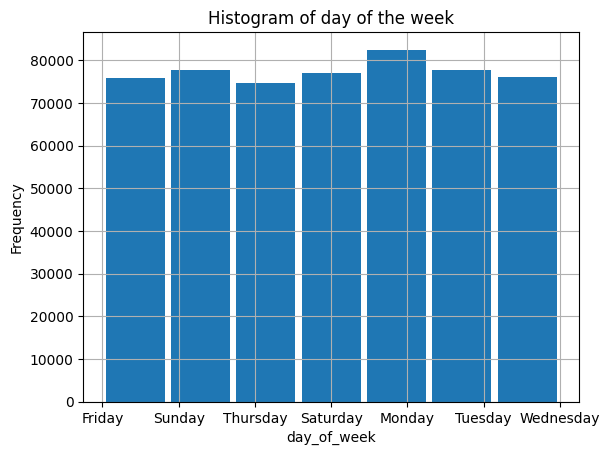

In [54]:

plt.figure()
firstDfToUse['day_of_week'].hist(rwidth=0.9, bins=7)
plt.title(f'Histogram of day of the week')
plt.xlabel('day_of_week')
plt.ylabel('Frequency')
plt.show()

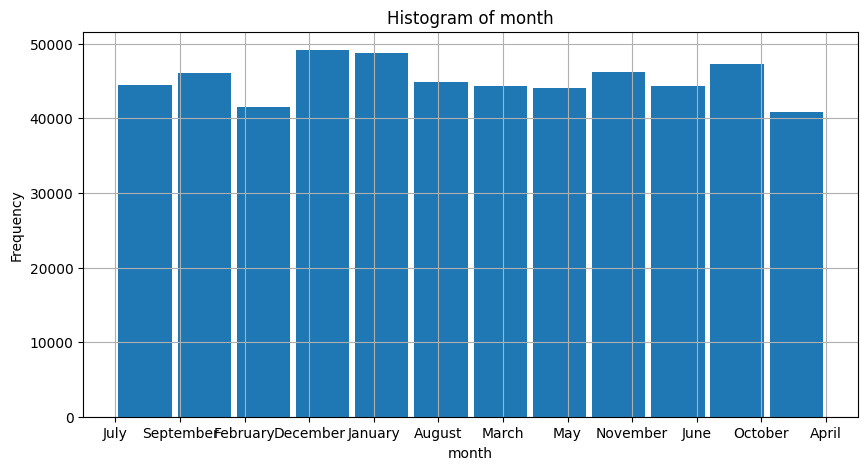

In [59]:
plt.figure(figsize=(10, 5))
firstDfToUse['month'].hist(rwidth=0.9, bins=12)
plt.title(f'Histogram of month')
plt.xlabel('month')
plt.ylabel('Frequency')
plt.show()

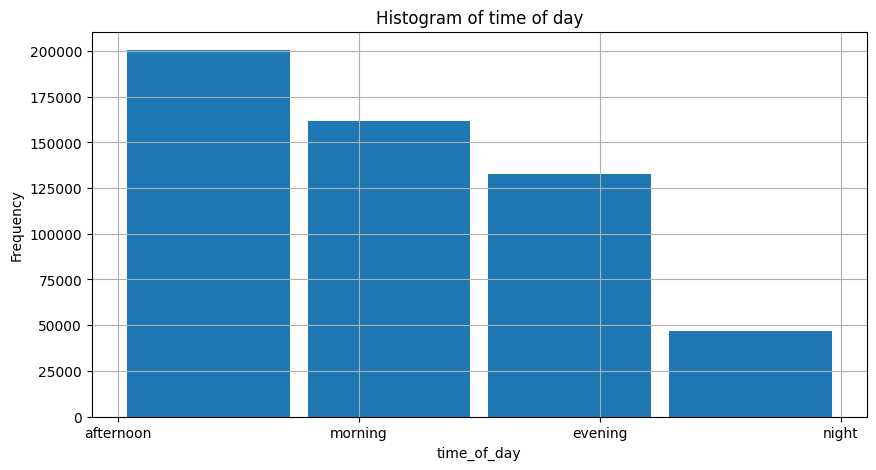

In [60]:
plt.figure(figsize=(10, 5))
firstDfToUse['time_of_day'].hist(rwidth=0.9, bins=4)
plt.title(f'Histogram of time of day')
plt.xlabel('time_of_day')
plt.ylabel('Frequency')
plt.show()

In [63]:
firstDfToUse

,triage_category,total_time_in_ed,total_time_in_ed_interval,day_of_week,month,time_of_day,mode_of_arrival_category
0,4.0,0 days 03:45:00,"(210, 240]",Friday,July,afternoon,Private transport
1,4.0,0 days 00:34:00,"(30, 60]",Sunday,September,morning,Private transport
2,2.0,0 days 10:15:00,"(600, 630]",Thursday,February,evening,Ambulance
3,3.0,0 days 09:45:00,"(570, 600]",Friday,December,afternoon,Private transport
4,3.0,0 days 02:13:00,"(120, 150]",Sunday,January,morning,Private transport
...,...,...,...,...,...,...,...
541765,3.0,0 days 01:39:00,"(90, 120]",Monday,February,evening,Private transport
541766,4.0,0 days 05:41:00,"(330, 360]",Sunday,July,morning,Private transport
541767,5.0,0 days 00:18:00,"(0, 30]",Wednesday,August,evening,Private transport
541768,3.0,0 days 03:50:00,"(210, 240]",Wednesday,April,afternoon,Private transport


In [64]:
from sklearn.preprocessing import LabelEncoder

columnsToEncode = ['total_time_in_ed_interval', 'day_of_week', 'month', 'time_of_day','mode_of_arrival_category']
label_encoder = LabelEncoder()
for column in columnsToEncode:
    firstDfToUse[column] = label_encoder.fit_transform(firstDfToUse[column])

/tmp/ipykernel_11304/377438381.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstDfToUse[column] = label_encoder.fit_transform(firstDfToUse[column])
/tmp/ipykernel_11304/377438381.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstDfToUse[column] = label_encoder.fit_transform(firstDfToUse[column])
/tmp/ipykernel_11304/377438381.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [8]:
HackathonSyntheticData['presentation_datetime'] = pd.to_datetime(HackathonSyntheticData['presentation_datetime'])
HackathonSyntheticData['presentation_datetime'] = HackathonSyntheticData['presentation_datetime'].dt.round('H')
HackathonSyntheticData['day_of_week'] = HackathonSyntheticData['presentation_datetime'].dt.day_name()
HackathonSyntheticData['month'] = HackathonSyntheticData['presentation_datetime'].dt.month_name()
HackathonSyntheticData['hour'] = HackathonSyntheticData['presentation_datetime'].dt.hour
people_count_org = HackathonSyntheticData.groupby(['day_of_week', 'month', 'hour', 'triage_category','establishment_code']).size().reset_index(name='count')

In [40]:
people_count_org

,day_of_week,month,hour,triage_category,establishment_code,count
0,Friday,April,0,2.0,7001,3
1,Friday,April,0,2.0,7002,1
2,Friday,April,0,2.0,7006,1
3,Friday,April,0,2.0,7007,3
4,Friday,April,0,2.0,7008,1
...,...,...,...,...,...,...
178552,Wednesday,September,23,5.0,7015,1
178553,Wednesday,September,23,5.0,7017,1
178554,Wednesday,September,23,5.0,7021,1
178555,Wednesday,September,23,5.0,7033,1


In [42]:
hospitalDict = {7000+c:"Hospital "+str(c) for c in range(0, 79)}
people_count_org.loc[:,'establishment_code'] = people_count_org['establishment_code'].map(hospitalDict)


In [29]:
people_count_org_nodatetime

,triage_category,establishment_code,count,day_of_week,month,hour
0,2.0,Hospital 11,1,Saturday,January,0
1,2.0,Hospital 15,1,Saturday,January,0
2,3.0,Hospital 0,1,Saturday,January,0
3,3.0,Hospital 1,2,Saturday,January,0
4,3.0,Hospital 6,2,Saturday,January,0
...,...,...,...,...,...,...
339008,4.0,Hospital 9,1,Sunday,January,0
339009,4.0,Hospital 11,1,Sunday,January,0
339010,4.0,Hospital 17,2,Sunday,January,0
339011,4.0,Hospital 21,1,Sunday,January,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor




models = {
    'linear_regression': LinearRegression(),
    'random_forest': RandomForestRegressor(),
    'decision_tree': DecisionTreeRegressor(),
    'gradient_boosting': GradientBoostingRegressor(),
    'Linearsvr': LinearSVR(),
    'sgd': SGDRegressor(),
    'svr': SVR()
}
modelScores = {}

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['day_of_week', 'month', 'hour', 'triage_category'])
    ])

# Preprocess the data
X = preprocessor.fit_transform(people_count_org_nodatetime.drop(columns=['count']))
y = people_count_org_nodatetime[['count']].to_numpy().ravel()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for modelName, model in models.items():
# Define preprocessor

# Train the model
    model.fit(X_train, y_train)

# Evaluate the model
    predictions = model.predict(X_test)
    score = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, predictions)
    modelScores[modelName] = {'mse': mse, 'score': score}

print('Model scores:', modelScores)

# Predict



/home/jp-navarro/Documents/repos/WAHealthHackathon-DataDucks/.hackathon_venv/lib64/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model scores: {'linear_regression': {'mse': 41.71855820107283, 'score': 0.7691303587542496}, 'random_forest': {'mse': 23.60004980208208, 'score': 0.8693978108033364}, 'decision_tree': {'mse': 25.310156708810688, 'score': 0.8599341144276031}, 'gradient_boosting': {'mse': 29.752640230730474, 'score': 0.8353495021789612}, 'Linearsvr': {'mse': 44.56911289192866, 'score': 0.7533554478463182}, 'sgd': {'mse': 41.71252778366049, 'score': 0.7691637309599199}, 'svr': {'mse': 21.319085982167152, 'score': 0.8820206175710151}}


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['day_of_week', 'month', 'hour', 'triage_category', 'establishment_code'])
    ])

# Preprocess the data
X = preprocessor.fit_transform(people_count_org_nodatetime.drop(columns=['count']))
y = people_count_org_nodatetime[['count']].to_numpy().ravel()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR()

param_grid = {
    "kernel":['poly'],
    'degree': [2, 3, 4, 5]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import OneHotEncoder
from joblib import dump

# Assuming df is your DataFrame
encoder = OneHotEncoder(handle_unknown='ignore')
X = encoder.fit_transform(people_count_org[['day_of_week', 'month', 'hour', 'triage_category', 'establishment_code']])
y = people_count_org['count']

# Define the model and the parameters grid
model = SGDRegressor()
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
best_model = grid_search.best_estimator_

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
# dump(best_model, 'best_model.joblib')

/home/jp-navarro/Documents/repos/WAHealthHackathon-DataDucks/.hackathon_venv/lib64/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jp-navarro/Documents/repos/WAHealthHackathon-DataDucks/.hackathon_venv/lib64/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jp-navarro/Documents/repos/WAHealthHackathon-DataDucks/.hackathon_venv/lib64/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jp-navarro/Documents/repos/WAHealthHackathon-DataDucks/.hackathon_venv/lib64/python3.11/sit

Best parameters:  {'alpha': 0.0001, 'learning_rate': 'adaptive', 'loss': 'squared_error', 'penalty': 'l1'}
Best score:  -5.543032850030857


In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


encoder = OneHotEncoder(handle_unknown='ignore')

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(), ['day_of_week', 'month', 'hour', 'triage_category', 'establishment_code'])
#     ])

# Preprocess the data
X = encoder.fit_transform(people_count_org.drop(columns=['count']))
y = people_count_org[['count']].to_numpy().ravel()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SGDRegressor(alpha= 0.0001, learning_rate='adaptive', loss='squared_error', penalty='l1')
# model = SVR()
# model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, predictions)
print("Score: ", score)
print("MSE: ", mse)

Score:  0.521464191541541
MSE:  5.606331589295457


In [13]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [22]:
pd.get_dummies(people_count_org,columns=['day_of_week', 'month', 'hour', 'establishment_code'])

,triage_category,count,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,month_April,...,establishment_code_7069,establishment_code_7070,establishment_code_7071,establishment_code_7072,establishment_code_7073,establishment_code_7074,establishment_code_7075,establishment_code_7076,establishment_code_7077,establishment_code_7078
0,2.0,3,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2.0,1,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2.0,3,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2.0,1,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178552,5.0,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
178553,5.0,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
178554,5.0,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
178555,5.0,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
people_count_org[people_count_org['count'] > 20]

,day_of_week,month,hour,triage_category,establishment_code,count
714,Friday,April,10,3,7011,27
837,Friday,April,11,3,7017,22
953,Friday,April,12,3,7017,21
986,Friday,April,12,4,7008,22
1068,Friday,April,13,3,7012,21
...,...,...,...,...,...,...
173481,Wednesday,November,15,3,7011,22
173721,Wednesday,November,17,3,7011,21
173836,Wednesday,November,18,3,7011,22
173952,Wednesday,November,19,3,7017,21


In [28]:
from tensorflow import keras
import keras_tuner as kt
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
class RegressionModel(kt.HyperModel):
    def __init__(self, input_dim):
        self.input_dim = input_dim
    def build(self, hp):
        model = keras.Sequential()
        model.add(keras.layers.Dense(units=hp.Int('units_input', min_value=32, max_value=256, step=32, default=64), 
                                input_dim=self.input_dim, 
                                activation='relu'))
        
        for i in range(hp.Int('n_layers', 1, 4)):  # number of hidden layers
                    model.add(keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                                    activation='relu'))

        # Tune the number of units in the first Dense layer
        # Choose an optimal value between 32-512
        model.add(keras.layers.Dense(1))

        # Tune the learning rate for the optimizer
        # Choose an optimal value from 0.01, 0.001, or 0.0001
        # hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

        model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
                        loss=keras.losses.MeanSquaredError(),
                        metrics=['mean_absolute_error'])

        return model

In [42]:
print(X_train.dtypes)

triage_category            float64
day_of_week_Friday            bool
day_of_week_Monday            bool
day_of_week_Saturday          bool
day_of_week_Sunday            bool
                            ...   
establishment_code_7074       bool
establishment_code_7075       bool
establishment_code_7076       bool
establishment_code_7077       bool
establishment_code_7078       bool
Length: 123, dtype: object


In [45]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
people_count_org['triage_category'] = people_count_org['triage_category'].apply(lambda x: int(x))
df = pd.get_dummies(people_count_org,columns=['day_of_week', 'month', 'hour', 'establishment_code', 'triage_category'])
# scaler = StandardScaler()
df = df.drop(columns=['count'])
# df['triage_category'] = scaler.fit_transform(df[['triage_category']])
X = df.copy()
y = people_count_org['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_dim = X_train.shape[1]

hypermodel = RegressionModel(input_dim=input_dim)

tuner = kt.RandomSearch(hypermodel,
                     objective='mean_absolute_error',
                     max_trials=10,
                     max_retries_per_trial=2,
                     directory='models/',
                     project_name='hackathon')

# stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Get the optimal hyperparameters
best_hps=tuner.get_best_models(num_models=1)[0]

# print(f"""
# The hyperparameter search is complete. The optimal number of units in the first densely-connected
# layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
# is {best_hps.get('learning_rate')}.
# """)

Trial 10 Complete [00h 04m 07s]
mean_absolute_error: 0.7963422536849976

Best mean_absolute_error So Far: 0.7352226972579956
Total elapsed time: 00h 37m 00s


In [59]:
# print(tuner.get_best_hyperparameters()[0].values)
print(tuner.results_summary())
# tuner.get_best_models()[0].save('models/best_model.h5')

Results summary
Results in models/hackathon
Showing 10 best trials
Objective(name="mean_absolute_error", direction="min")

Trial 07 summary
Hyperparameters:
units_input: 192
n_layers: 4
units_0: 96
optimizer: adam
units_1: 32
units_2: 128
units_3: 256
Score: 0.7352226972579956

Trial 03 summary
Hyperparameters:
units_input: 256
n_layers: 3
units_0: 64
optimizer: adam
units_1: 96
units_2: 256
units_3: 160
Score: 0.7385546565055847

Trial 02 summary
Hyperparameters:
units_input: 224
n_layers: 4
units_0: 64
optimizer: adam
units_1: 64
units_2: 256
units_3: 224
Score: 0.7546032667160034
Traceback (most recent call last):
  File "/home/jp-navarro/Documents/repos/WAHealthHackathon-DataDucks/.hackathon_venv/lib64/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/home/jp-navarro/Documents/repos/WAHealthHackathon-DataDucks/.hackathon_venv/lib64/python3.11/site-packages/ke

In [49]:
best_hps

In [10]:
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
encoder = OneHotEncoder(handle_unknown='ignore')
X = encoder.fit_transform(people_count_org[['day_of_week', 'month', 'hour', 'triage_category', 'establishment_code']])
y = people_count_org['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train.toarray(), y_train, epochs=50, batch_size=32)

# Save the model and the encoder
# Evaluate the model
evalResults = model.evaluate(X_test.toarray(), y_test)
print('Results:', evalResults)

Epoch 1/50
4464/4464 [==============================] - 4s 768us/step - loss: 3.0994
Epoch 2/50
4464/4464 [==============================] - 3s 719us/step - loss: 2.5083
Epoch 3/50
4464/4464 [==============================] - 3s 699us/step - loss: 2.4415
Epoch 4/50
4464/4464 [==============================] - 3s 681us/step - loss: 2.4068
Epoch 5/50
4464/4464 [==============================] - 3s 686us/step - loss: 2.3809
Epoch 6/50
4464/4464 [==============================] - 3s 712us/step - loss: 2.3641
Epoch 7/50
4464/4464 [==============================] - 3s 687us/step - loss: 2.3509
Epoch 8/50
4464/4464 [==============================] - 3s 691us/step - loss: 2.3352
Epoch 9/50
4464/4464 [==============================] - 3s 706us/step - loss: 2.3263
Epoch 10/50
4464/4464 [==============================] - 3s 702us/step - loss: 2.3192
Epoch 11/50
4464/4464 [==============================] - 3s 725us/step - loss: 2.3127
Epoch 12/50
4464/4464 [==============================] - 3s 751

In [45]:
y_test_df = pd.DataFrame(y_test, columns=['count'])
y_test_df['prediction'] = predictions

In [46]:
y_test_df # SGDRegressor

,count,prediction
0,2,4.410362
1,1,-0.609815
2,1,1.265422
3,2,3.369331
4,2,-0.196963
...,...,...
35707,4,5.960965
35708,2,2.379654
35709,1,0.081603
35710,2,6.255213


In [35]:
y_test_df # SVR Poly

,count,prediction
0,42,37.164246
1,31,23.160156
2,8,9.366439
3,31,33.600548
4,4,3.804834
...,...,...
7298,45,40.100451
7299,38,35.089411
7300,5,2.805757
7301,3,3.134059


In [32]:
y_test_df # SVR

,count,prediction
0,42,36.237909
1,31,22.769100
2,8,10.174042
3,31,32.957396
4,4,3.617938
...,...,...
7298,45,38.787147
7299,38,34.511213
7300,5,2.720495
7301,3,2.535894


In [29]:
y_test_df # Random Forest

,count,prediction
0,42,43.023167
1,31,19.793500
2,8,7.254270
3,31,37.574627
4,4,3.567238
...,...,...
7298,45,43.613667
7299,38,45.346167
7300,5,3.094238
7301,3,1.741905


In [63]:
def predict_per_triage(model, preprocessor, day_of_week, month, hour, hospital):
    import numpy as np
    # Create a dataframe with the given parameters
    ['day_of_week', 'month', 'hour', 'triage_category', 'establishment_code']
    df = pd.DataFrame({'day_of_week':[day_of_week]*5, 'month':[month]*5, 'hour':[hour]*5, 'triage_category': list(range(1, 6)), 'establishment_code':[hospital]*5})
    # Preprocess the data
    X = preprocessor.transform(df)
    
    # Predict
    prediction = model.predict(X.toarray())

    result = pd.DataFrame(prediction, columns=['count'])
    result['triage_category'] = ['Red','Orange','Yellow','Blue','Green']
    
    # Return the prediction
    return result

In [66]:
people_count_org[(people_count_org['establishment_code'] == 'Hospital 1') & (people_count_org['day_of_week'] == 'Monday') & (people_count_org['month'] == 'June') & (people_count_org['hour'] == 10)]

,day_of_week,month,hour,triage_category,establishment_code,count
38692,Monday,June,10,2.0,Hospital 1,3
38715,Monday,June,10,3.0,Hospital 1,5
38752,Monday,June,10,4.0,Hospital 1,22


In [65]:
predict_per_triage(model=model, preprocessor=encoder, day_of_week = 'Monday', month='June', hour=10, hospital='Hospital 1')

1/1 [==============================] - 0s 13ms/step


,count,triage_category
0,0.890135,Red
1,3.402966,Orange
2,13.880432,Yellow
3,17.419186,Blue
4,1.212436,Green


# Second Model
Predicts the duration per triage and transport (mode_of_transport) of a patient in the emergency room.

In [ ]:
HackathonSyntheticData

In [19]:
secondDfToUse = HackathonSyntheticData[['triage_category', 'total_time_in_ed_interval', 'hour','mode_of_arrival','metropolitan_hospital_flag','total_time_in_ed']].copy()
secondDfToUse.loc[:,'total_time_in_ed_minutes'] = secondDfToUse['total_time_in_ed'].dt.total_seconds() / 60
secondDfToUse.loc[:,'total_time_in_ed_interval_cat'] = secondDfToUse['total_time_in_ed_interval'].apply(lambda x: f"{x.left}")
# secondDfToUse.drop(columns=['total_time_in_ed_interval', 'total_time_in_ed'], inplace=True)

In [20]:
secondDfToUse.drop(columns=['total_time_in_ed'], inplace=True)

In [19]:
99/24

4.125

In [17]:
secondDfToUse['total_time_in_ed_minutes'].max()

5943.0

In [11]:
# Assuming df is your DataFrame and 'target' is the name of your target column
dataWithDummys = pd.get_dummies(secondDfToUse, columns=['day_of_week', 'month', 'time_of_day'])
correlation = dataWithDummys.corr()['total_time_in_ed_minutes'].sort_values()
print(correlation)

triage_category              -0.152872
time_of_day_morning          -0.057878
month_January                -0.037412
time_of_day_afternoon        -0.024094
day_of_week_Saturday         -0.019623
month_February               -0.017557
day_of_week_Sunday           -0.012696
month_March                  -0.009618
month_April                  -0.007789
month_December               -0.003834
day_of_week_Friday            0.002148
month_November                0.002368
day_of_week_Thursday          0.002625
month_October                 0.003743
month_May                     0.004381
month_June                    0.005313
day_of_week_Tuesday           0.006736
month_September               0.006755
day_of_week_Monday            0.009897
day_of_week_Wednesday         0.010747
hour                          0.020130
month_July                    0.024876
month_August                  0.029373
time_of_day_night             0.049710
time_of_day_evening           0.052591
mode_of_arrival          

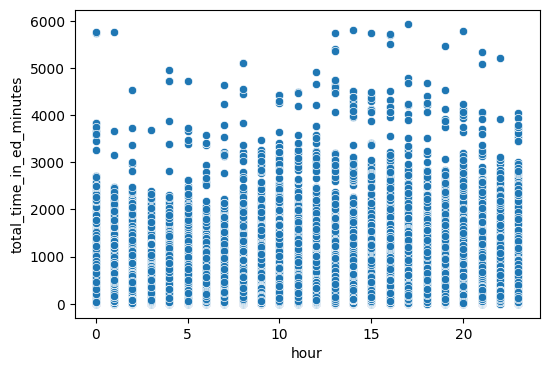

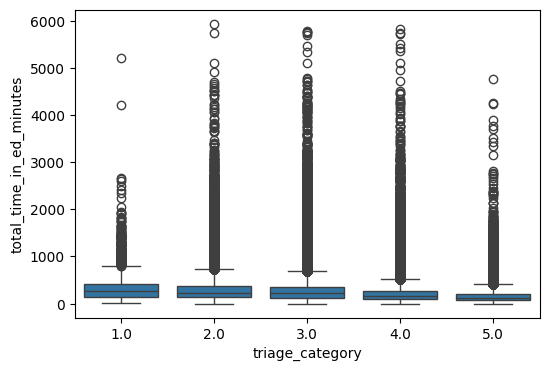

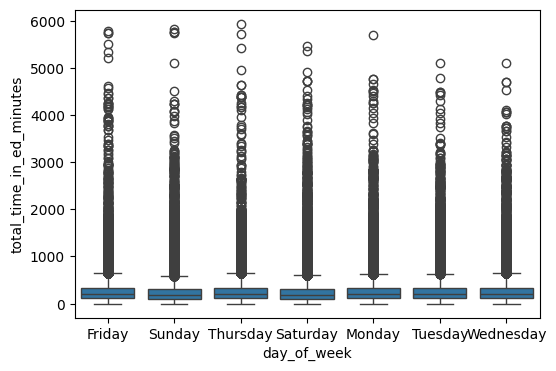

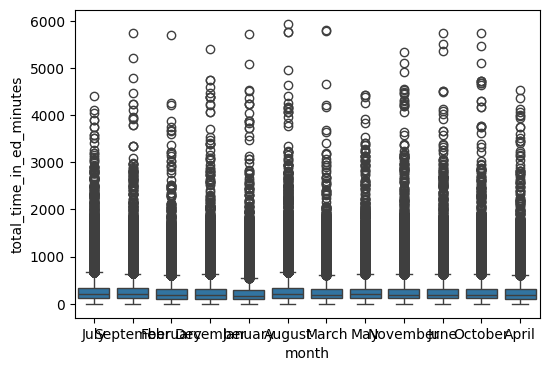

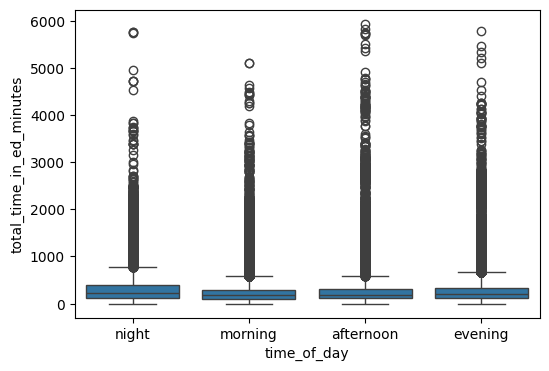

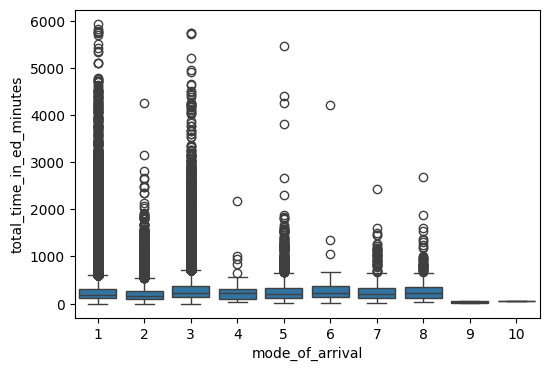

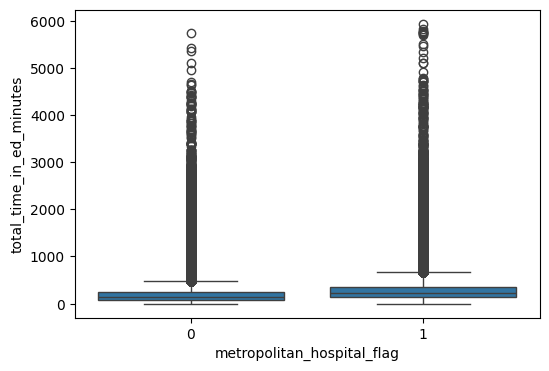

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['hour']
categorical_cols = ['triage_category', 'day_of_week', 'month', 'time_of_day','mode_of_arrival','metropolitan_hospital_flag']
# For numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=secondDfToUse, x=col, y='total_time_in_ed_minutes')
    plt.show()

# For categorical features
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=secondDfToUse, x=col, y='total_time_in_ed_minutes')
    plt.show()

In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

X = secondDfToUse.drop(columns=['total_time_in_ed_minutes'])
# X = pd.get_dummies(X)
y = secondDfToUse[['total_time_in_ed_minutes']].to_numpy().ravel()
# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define the model
model = SVR()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


In [135]:
model.score(X_test, y_test)

-0.017779422113325838

In [22]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import LearningRateScheduler


# Assuming df is your DataFrame and 'target' is your target column

# One-hot encode categorical columns
secondDfToUse['triage_category'] = secondDfToUse['triage_category'].astype(int)
# secondDfToUse.loc[:,'mode_of_arrival'] = secondDfToUse['mode_of_arrival'].astype(str)
dfToTrain = secondDfToUse.drop(columns=['total_time_in_ed_interval'])
df_encoded = pd.get_dummies(dfToTrain,columns=dfToTrain.columns)

# Define features and target
X = df_encoded
y = secondDfToUse['total_time_in_ed_interval']

# Scale your features
y = pd.get_dummies(y)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
SecondModel = Sequential()
SecondModel.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
SecondModel.add(Dense(64, activation='relu'))
SecondModel.add(Dense(32, activation='relu'))
SecondModel.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
SecondModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
SecondModel.fit(X_train, y_train, epochs=50, batch_size=32)
# Create a LearningRateScheduler callback
# lr_callback = LearningRateScheduler(lr_schedule)

# Train the model with the callback
# SecondModel.fit(X_train, y_train, epochs=50, callbacks=[lr_callback])

# Evaluate the model
evalResults = SecondModel.evaluate(X_test, y_test)
print('Results:', evalResults)

# Make a prediction
prediction = SecondModel.predict(X_test)
print('Prediction:', prediction)



In [110]:
HackathonSyntheticData.columns

Index(['person_ID', 'establishment_code', 'presentation_datetime',
       'clinical_care_commencement_datetime', 'bed_request_datetime',
       'discharge_datetime', 'metropolitan_hospital_flag', 'age', 'sex',
       'ethnicity', 'triage_category', 'mode_of_arrival', 'departure_status',
       'affected_by_drugs_and_or_alcohol', 'self_harm_attendance',
       'mental_health_attendance', 'mental_health_admission',
       'potentially_avoidable_general_practitioner_type_attendance',
       'primary_diagnosis_ICD10AM_chapter', 'total_time_in_ed', 'day_of_week',
       'month', 'hour', 'time_of_day', 'total_time_in_ed_minutes',
       'total_time_in_ed_interval'],
      dtype='object')